WBC/RBC - Classifier

In [6]:

from tensorflow.keras.preprocessing import image_dataset_from_directory



data_train = image_dataset_from_directory('/home/max/Dokumente/Lissabon/Bootcamp/project/DataClass2/NewTraining/',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=64,
                                        image_size=(200,200),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.3,
                                        subset='training')



Found 10661 files belonging to 2 classes.
Using 7463 files for training.


In [7]:
data_val = image_dataset_from_directory('/home/max/Dokumente/Lissabon/Bootcamp/project/DataClass2/NewTraining/',          
                                        labels ='inferred',
                                        label_mode='binary',
                                        color_mode='rgb',                         
                                        batch_size=64,
                                        image_size=(200,200),
                                        shuffle=True,
                                        seed=42,
                                        validation_split=0.3,
                                        subset='validation')

Found 10661 files belonging to 2 classes.
Using 3198 files for validation.


In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = models.Sequential()
model.add(Rescaling(1./255, input_shape=(200,200,3)))
model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 48, 48, 32)       

In [12]:
from tensorflow.keras import optimizers

adam = optimizers.Adam()

model.compile(loss='binary_crossentropy',
             optimizer=adam,
             metrics=['accuracy','Recall'])

In [13]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(data_train,
                    epochs=15,
                    callbacks=es,
                    validation_data=data_val)

Epoch 1/15


2021-12-07 14:59:33.564084: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-07 14:59:33.590404: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2894705000 Hz


117/117 [==============================] - 107s 909ms/step - loss: 0.5018 - accuracy: 0.7785 - recall: 0.4295 - val_loss: 0.5054 - val_accuracy: 0.7992 - val_recall: 0.5721
Epoch 2/15
117/117 [==============================] - 106s 904ms/step - loss: 0.4786 - accuracy: 0.7957 - recall: 0.5421 - val_loss: 0.4681 - val_accuracy: 0.8021 - val_recall: 0.5283
Epoch 3/15
117/117 [==============================] - 105s 900ms/step - loss: 0.4685 - accuracy: 0.8010 - recall: 0.5489 - val_loss: 0.4513 - val_accuracy: 0.8093 - val_recall: 0.5975
Epoch 4/15
117/117 [==============================] - 106s 904ms/step - loss: 0.4668 - accuracy: 0.8104 - recall: 0.5595 - val_loss: 0.4464 - val_accuracy: 0.8093 - val_recall: 0.5468
Epoch 5/15
117/117 [==============================] - 105s 900ms/step - loss: 0.4500 - accuracy: 0.8107 - recall: 0.5785 - val_loss: 0.4432 - val_accuracy: 0.8096 - val_recall: 0.5487
Epoch 6/15
117/117 [==============================] - 106s 903ms/step - loss: 0.4389 - accu

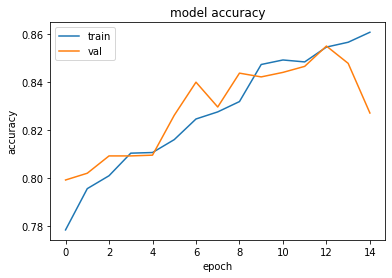

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

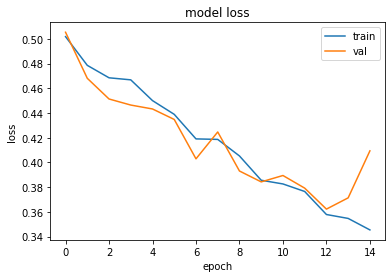

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()